,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


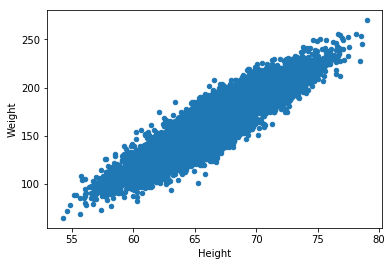

In [6]:
import pandas as pd
import matplotlib
%matplotlib inline
df = pd.read_csv("C:/Users/niels/HackU_ML/civicu-machine-learning/lessons/shared-resources/heights_weights_genders.csv")
df.plot.scatter(x="Height", y="Weight")
df.describe()

In [21]:
def predict_weight(height):
    #returns weight based on height
    a = 3
    b = 20
    return height * a + b
    


In [76]:
height = df.Height[1]
print(df.loc[1])
print(predict_weight(height))


Gender      0.000000
Height     68.781904
Weight    162.310473
Name: 1, dtype: float64
226.345712138


In [36]:
import sklearn
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

#df.Height.values
#displays the array of values for the Heights of the dataframe
X = df.Height.values.reshape(-1,1)
y = df.Weight
lr.fit(X, y)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


In [38]:
((lr.predict(X) - y) ** 2).mean() **.05

1.2844051629719526

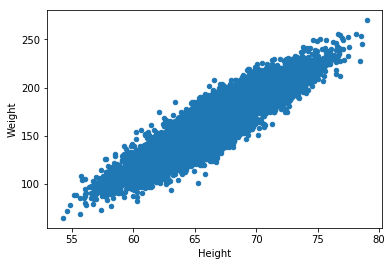

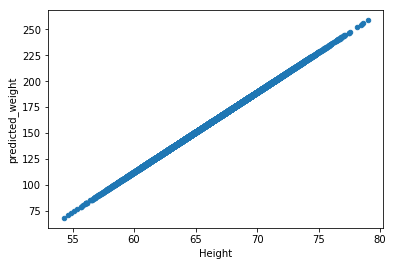

In [47]:
df.plot(kind='scatter', x='Height', y='Weight')
df['predicted_weight'] = lr.predict(X)
df.plot(kind='scatter', x='Height', y='predicted_weight')

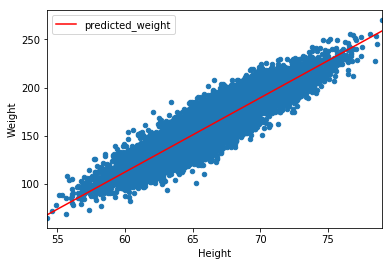

In [48]:
ax= df.plot(kind='scatter', x='Height', y='Weight')
df=df.sort_values('Height')
df.plot(ax=ax, kind='line', x='Height', y='predicted_weight', color='red')

In [72]:
#mask fuckery ; read github
df = pd.read_csv("C:/Users/niels/HackU_ML/civicu-machine-learning/lessons/shared-resources/heights_weights_genders.csv")
mask = df.Gender == "Female"
df[mask]
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FFD61B4E0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000021FFD927390>]], dtype=object)

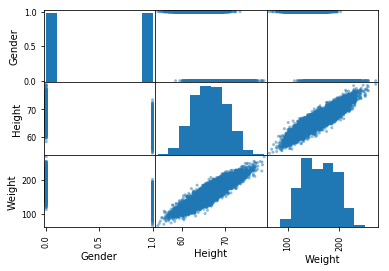

In [74]:
df.Gender = mask.astype(int)
pd.plotting.scatter_matrix(df)

In [75]:
df.corr()
#gets the correlation

,Gender,Height,Weight
Gender,1.000000,-0.691072,-0.796723
Height,-0.691072,1.000000,0.924756
Weight,-0.796723,0.924756,1.000000


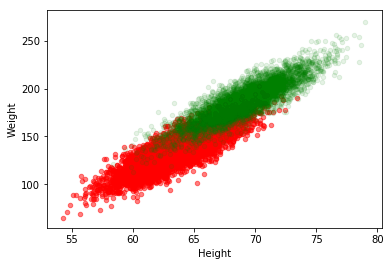

In [77]:
ax = df[mask].plot(kind='scatter', alpha=.5, x='Height', y='Weight', c='red')
#creates a plot object called ax that will show the women in red
df[~mask].plot(ax=ax, alpha=.1, kind='scatter', x='Height', y='Weight', c='green')
#plots the former object ax and a newly generated plot that shows "not-females" in green as ~mask; tilde is the operand for not in pandas

In [81]:
lr_gender = LinearRegression()
lr_gender = lr_gender.fit(df.Height.values.reshape(-1, 1), df.Gender)
df['predicted_gender'] = lr_gender.predict(df.Height.values.reshape(-1, 1))
#creates a column/key named predicted_gender for predicted gender according to a linear regression principle 
df['sigmoid_predicted_gender'] = 1 / (1 + pd.np.exp(-df.predicted_gender))
#creates a column in the df for a sigmoid function that predicts the gender based off the predicted_gender LR-line
df

,Gender,Height,Weight,predicted_gender,sigmoid_predicted_gender
0,0,73.847017,241.893563,-0.171743,0.457169
1,0,68.781904,162.310473,0.283163,0.570322
2,0,74.110105,212.740856,-0.195372,0.451312
3,0,71.730978,220.042470,0.018302,0.504575
4,0,69.881796,206.349801,0.184380,0.545965
5,0,67.253016,152.212156,0.420476,0.603597
6,0,68.785081,183.927889,0.282878,0.570252
7,0,68.348516,167.971110,0.322087,0.579833
8,0,67.018950,175.929440,0.441498,0.608616
9,0,63.456494,156.399676,0.761448,0.681668


In [104]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
log_by_height = logistic.fit(df.Height.values.reshape(-1, 1), df.Gender)
df['logreg_predicted_gender'] = log_by_height.predict(df.Height.values.reshape(-1, 1))
#adds column that predicts the gender using logistic regression from sklearn, 
#so that the prediction are unambiguous, or a classification


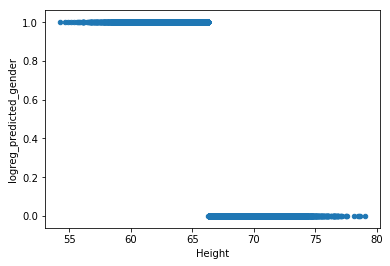

In [105]:
df.plot.scatter(x='Height', y='logreg_predicted_gender')

In [ ]:
df['predict_proba'] = logistic.predict_proba(df.Height.values.reshape(-1, 1))[:,1]
df.plot.scatter(x='Height', y='predict_proba')